## *Note:-* Titanic Data Set used

> ## Question Phase
***

There are many questions that can be answered by the given data set(titanic_data.csv).      
Some of the questions are:-

**Q1.** Compare the survial rate on the basis of gender of passangers ?

**Q2.** How the passanger survival varies with the age of the passangers.

> ## Answer to the Question
***

**Exploration of the titanic data set**
_________________________________________

Firstly we should know about the data set. What are the colums? Are the columns have proper data? is there any data that is missing or not in the good format, if yes then correct that.

**Code:-**

In [344]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 20

In [345]:
titanic_data=pd.read_csv('titanic_data.csv')             #Get the data from the titanic_data.csv

In [346]:
print titanic_data.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [347]:
print titanic_data.head(3)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [348]:
num_pass = titanic_data['PassengerId'].count()
print num_pass
print len(titanic_data['PassengerId'].unique())
if num_pass == len(titanic_data['PassengerId'].unique()) :
    print 'The two values are equal so it means there is no duplicate Passenger Id available'

891
891
The two values are equal so it means there is no duplicate Passenger Id available


In [349]:
s=[0,1]
temp=0
for survival in titanic_data['Survived']:
    if survival not in s:
        temp=1
        print 'There is atleast one value for which the survival status is not defined'
        break
if temp == 0:
    print 'Every passanger has been correctly marked whether survived or not '

Every passanger has been correctly marked whether survived or not 


Lets now look at the **Age** of the passangers

In [350]:
cr=0
cw=0
for age in titanic_data['Age']:
    if age > 0 and age < 100:
        cr=cr+1
    else:
        cw=cw+1
        if cw==1:
            print 'One of the invalid age is: ',age
if cw == 0:
    print 'There is nothing wrong with the Age column'
else:
    print 'Number of valid values',cr
    print 'Number of invalid values',cw
print 'Total=',cw+cr

One of the invalid age is:  nan
Number of valid values 714
Number of invalid values 177
Total= 891


Now we can tell that there are 177 invalid enteries. So firstly print one of the entery to see the problem.

The invalid age is NaN(not a number). So it means that the age is not given for some passangers.

So lets find out among 177 invalid values how many are nan ?

In [351]:
c=0
for age in titanic_data['Age']:
    if np.isnan(age) :
        c=c+1
if c==cw:
    print 'All invalid values are NaN'
else:
    print 'There is still some values of age that are written but are invalid'

All invalid values are NaN


>So that means There are 177 empty cells of Age column.

>And we should take it in account when we gona deal with the age. Lets say we want to see How the survival rate vary with the age then we should either discard those rows where the age values are not given, Or give some value to all empty age colums like '0'.

**Q1.** Compare the survial rate on the basis of gender of passangers ?
---
**Ans:-**      To get the answer for the question we should first calculate the number of female passanger and male passanger.   
Then calculate how many survived from the total number of passangers

Lets create our hypothesis and the null hypothesis is that there should be no difference in the survival rate of all the passangers on the basis of gender.    
And Alternate hypothesis is that there will be difference between and the survival rate will vary according to the gender    
Ho:- Sf = Sm   
Ha:- SF != Sm   
Sf = Survival rate of female    
Sm = Survival rate of male

**Code :-**

In [352]:
gp_gender=titanic_data.groupby('Sex')                    #Group data according to the gender
count_total=gp_gender.count()['PassengerId']             #count the total in the grouped data
sum_col=gp_gender.sum()                                  #Add the values of the Columns
print "FEMALE"
print "======"
print 'Total number of Female passangers:-',count_total.loc['female']
print 'Total number of Female passangers survived:-',sum_col['Survived'].loc['female']
print 'Number of female not survived:-',(count_total.loc['female'])-(sum_col['Survived'].loc['female'])
print "\nMALE"
print "===="
print 'Total number of Male passangers:-',count_total.loc['male']
print 'Total number of Male passangers survived:-',sum_col['Survived'].loc['male']
print 'Number of female not survived:-',(count_total.loc['male'])-(sum_col['Survived'].loc['male'])

FEMALE
Total number of Female passangers:- 314
Total number of Female passangers survived:- 233
Number of female not survived:- 81

MALE
====
Total number of Male passangers:- 577
Total number of Male passangers survived:- 109
Number of female not survived:- 468


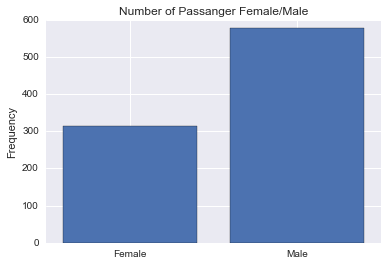

In [353]:
xvalue=[1,2]
plt.bar(xvalue,count_total,align='center')
plt.xticks(xvalue,['Female','Male'])
plt.title("Number of Passanger Female/Male")
plt.ylabel("Frequency")
plt.show()

Note:- Number of Males Passanger are more as compare to the number of Female Passanger.

In [354]:
def plot_percentage(gender):
    labels = ['Survived','Not Survived']
    sizes = [(sum_col['Survived'].loc[gender]),((count_total.loc[gender])-(sum_col['Survived'].loc[gender]))]
    colors = ['green','red']
    explode=(1,0)
    plt.pie(sizes, explode=(0.1,0), labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=60,radius=0.25)
    plt.axis('equal')
    plt.title(gender.upper())
    plt.show()

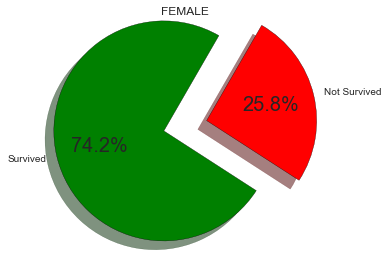

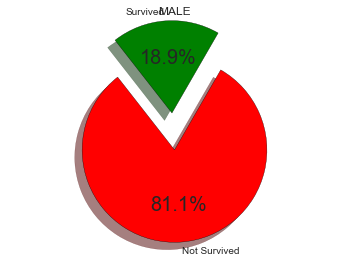

In [355]:
plot_percentage('female')
plot_percentage('male')


>The female survival rate is more as compare to the male survival rate.  
And it can be seen in the pie chart.   
As we can see that the number of Female passanger are less in number as compare to the male passanger from the bar graph above    still 74.2% Female survived But only 18.9% male survived. 

_____

**Q2.** How the passanger survival varies with the age of the passangers ?
---
**Ans:-**   The data has passanger's age and it would be nice to see the variation of passanger survival on the basis of the age of the passanger. we will be able to tell after analysis that which age people are better at survival and the age at which the survival rate is low.

As we already know that 177 values of age columns are empty it means we don't have 177 passanger's age.

So we have two options:-
1. Either don't consider the passenger's who don't have there age mentioned, Or
2. Give the passenger who don't have age given some values

Both options have their pros and cons.

Lets talk about first option.   
<u>Pro</u> :-   If we discard the values whose age is not provided then we can give correct variation of age to survival rate of the passengers whose is provided.     
<u>Con</u> :-   We can't give the variation of survival rate with all the passangers of the titanic because we have not considered the complete data set and this changes the stastical values

Now comes the second option.     
<u>Pro</u> :-  If we give the passanger some age value then we can calculate the complete titanic data on the basis of that age values.    
<u>Con</u> :- But the bigest drawback is that it will completely change the variation of the complete data set

**Code:-**
____

In [356]:
gp_age = titanic_data.groupby('Age',as_index=False)

Firstly lets draw some relations on the data that we have or only consider the passangers whose ages are given.

In [357]:
total_survived=titanic_data.sum()['Survived']
print total_survived

342.0


In [358]:
gp_sum_age=gp_age.sum()
survived_with_age=gp_sum_age.sum()['Survived']
print survived_with_age
survived_without_age= total_survived-survived_with_age
print survived_without_age

290.0
52.0


We have already calculated that there are 714 passanger whose age is given and from 714 passangers 290 passangers have survived.    
And among the 177 passangers whose age is not available the number of surviving passangers is 52.     
so lets draw some visual representation of variation of passanger survival for the passangers whose age is given.

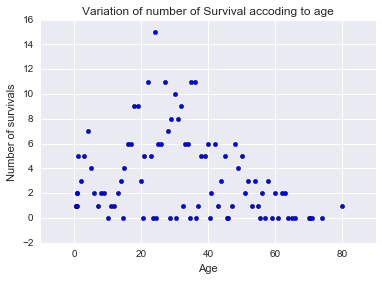

In [359]:
plt.scatter(gp_sum_age['Age'],gp_sum_age['Survived'])
plt.xlabel("Age")
plt.ylabel("Number of survivals")
plt.title('Variation of number of Survival accoding to age')
plt.show()

In [360]:
print 'The age of passanger who survived most is:-',gp_sum_age['Age'].iloc[gp_sum_age['Survived'].argmax()]

The age of passanger who survived most is:- 24.0


In [361]:
print 'The value of the maximum survial grrouped by Age is:- ',gp_sum_age['Survived'].max()


The value of the maximum survial grrouped by Age is:-  15


Now lets group the survived passangers in the age blocks of 20 each.

In [362]:
def ret_group(start,end):
    ind =  gp_sum_age[gp_sum_age['Age']>start].index[0]
    sliced_df=gp_sum_age.iloc[ind:]
    return sliced_df[gp_sum_age['Age']<=end].sum()['Survived']
group_values_survived=[]
for i in range(4):
    group_values_survived.append(ret_group(20*i,20*(i+1)))
group_values_survived.append(survived_without_age)
print group_values_survived
x_axis_survived=np.arange(5)
print x_axis_survived

[82.0, 153.0, 50.0, 5.0, 52.0]
[0 1 2 3 4]


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [363]:
gp_count = gp_age.count()
print 'Total Passangers with age given:- ',gp_count.sum()['PassengerId']
def ret_group_total(start,end):
    ind =  gp_count[gp_count['Age']>start].index[0]
    sliced_df=gp_count.iloc[ind:]
    return sliced_df[gp_count['Age']<=end].sum()['Survived']
print "After grouping Data with 20 age difference"
group_values_total=[]
for i in range(4):
    group_values_total.append(ret_group_total(20*i,20*(i+1)))
group_values_total.append(cw)
print group_values_total
group_values_notsurvived=np.array(group_values_total)-group_values_survived
print group_values_notsurvived

Total Passangers with age given:-  714.0
After grouping Data with 20 age difference
[179.0, 385.0, 128.0, 22.0, 177]
[  97.  232.   78.   17.  125.]


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


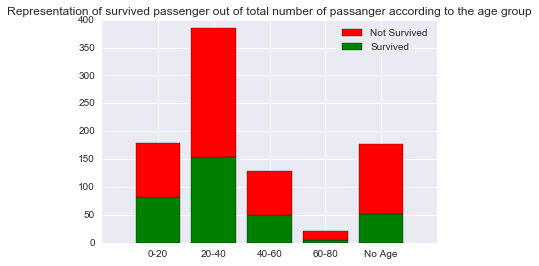

In [364]:
w=.8
p1=plt.bar(x_axis_survived,group_values_survived,width=w,color='green',align='center')
p2=plt.bar(x_axis_survived,group_values_notsurvived,bottom=group_values_survived,width=w,color='red',align='center')
plt.xticks(x_axis_total,('0-20','20-40','40-60','60-80','No Age'))
plt.legend((p2[0], p1[0]), ('Not Survived','Survived'))
plt.title('Representation of survived passenger out of total number of passanger according to the age group')
plt.show()

It can be seen that age group of 20-40 survived most but also number of passanger are also more in this group     
The last group is of passengers whose age is not given